# 4 star above

In [1]:
import scipy.sparse as sp 
import numpy as np 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [16]:
pos = sp.load_npz('sparse_pos_matrix.npz').toarray()
tfidf = sp.load_npz('tfidf.npz').toarray()

In [3]:
np.shape(tfidf)

(30904, 19904)

In [29]:
pos = np.array(pos).flatten()
np.shape(pos)

(30904,)

In [50]:
tot = len(pos)
train_ratings = pos[:int(tot * 0.7)]
dev_ratings = pos[int(tot * 0.7): int(tot * 0.85)]
test_ratings = pos[int(tot * 0.85):]
train_data = tfidf[:int(tot * 0.7)]
dev_data = tfidf[int(tot * 0.7): int(tot * 0.85)]
test_data = tfidf[int(tot * 0.85):]

In [36]:
np.shape(dev_ratings)

(4636,)

## Logreg 

In [37]:
C_range1 = {'C': [ 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] }

In [38]:
from sklearn.model_selection import GridSearchCV
def find_lambda(dev_data, ratings_data, C_range):
    # used link below for reference:
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
    #C_range = {'C': [ 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] }
    lr = LogisticRegression(penalty = 'l2', random_state = 0)
    clf = GridSearchCV(lr, C_range, cv=5)
    clf.fit(dev_data, ratings_data)
    return clf

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import time 

In [43]:
clf1 = find_lambda(dev_data, dev_ratings, C_range1)

/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
clf1.cv_results_

/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwa

{'mean_fit_time': array([0.52569242, 0.51044049, 0.58795834, 0.5920784 , 0.58774223,
        0.69269047, 0.98924909, 1.0785048 ]),
 'std_fit_time': array([0.04008165, 0.01932063, 0.03086132, 0.04837282, 0.05376328,
        0.07035177, 0.3000604 , 0.1713062 ]),
 'mean_score_time': array([0.02766099, 0.01976843, 0.02537737, 0.02250385, 0.02202039,
        0.02904229, 0.03872509, 0.02298884]),
 'std_score_time': array([0.008147  , 0.00101064, 0.00780675, 0.00366949, 0.00630378,
        0.00811958, 0.01885644, 0.00726877]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000},
  {'C': 10000},
  {'C': 100000}],
 'split0_test_score': array([0.61637931, 0.61637931, 0.66163793, 0.78232759, 0.81357759,
        0.82435345, 0.81357759, 0.81465517]),
 'split

In [48]:
t1 = time.time()
lg = LogisticRegression(penalty = 'l2', C=100, multi_class = 'multinomial',
solver='lbfgs').fit(train_data, train_ratings)
t2 = time.time()
print('lg training time', t2 - t1)

lg training time 117.15401983261108


/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [51]:
pred_ratings = lg.predict(test_data)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_ratings, test_ratings)

0.8371440897325281

## SVM 

In [53]:
#training SVM
t1 = time.time()
svm = LinearSVC(loss = "hinge").fit(train_data, train_ratings)
t2 = time.time()
print("svm training time", t2 - t1)

svm training time 3.6790478229522705


/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [54]:
pred_ratings_svm = svm.predict(test_data)
accuracy_score(pred_ratings_svm, test_ratings)

0.8065142364106989

SVM accuracy is marginally worse but training time is MUCH faster. 

# 5 star above

In [1]:
import scipy.sparse as sp 
import numpy as np 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

pos5 = sp.load_npz('5_star_review_array.npz').toarray()[0]
tfidf = sp.load_npz('tfidf.npz').toarray()

In [2]:
tot = len(pos5)
train_ratings = pos5[:int(tot * 0.7)]
dev_ratings = pos5[int(tot * 0.7): int(tot * 0.85)]
test_ratings = pos5[int(tot * 0.85):]
train_data = tfidf[:int(tot * 0.7)]
dev_data = tfidf[int(tot * 0.7): int(tot * 0.85)]
test_data = tfidf[int(tot * 0.85):]

In [3]:
pos5

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
C_range1 = {'C': [ 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

In [21]:
from sklearn.model_selection import GridSearchCV
def find_lambda(dev_data, ratings_data, C_range):
    # used link below for reference:
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
    #C_range = {'C': [ 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] }
    lr = LogisticRegression(penalty = 'l2', random_state = 0)
    clf = GridSearchCV(lr, C_range, cv=5)
    clf.fit(dev_data, ratings_data)
    return clf

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import time 

In [22]:
clf1 = find_lambda(dev_data, dev_ratings, C_range1)

/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
clf1.cv_results_

/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwa

{'mean_fit_time': array([0.75235958, 0.63742642, 0.69975839, 0.75259705, 0.55441656,
        0.70359139, 0.94120259, 0.9554585 ]),
 'std_fit_time': array([0.32389305, 0.0845797 , 0.0682567 , 0.05791268, 0.03715686,
        0.16558909, 0.08178839, 0.11673816]),
 'mean_score_time': array([0.02497778, 0.02253685, 0.03120503, 0.03356867, 0.02089539,
        0.02713017, 0.02851253, 0.02909894]),
 'std_score_time': array([0.00732202, 0.00660183, 0.01463112, 0.00889416, 0.00501153,
        0.00565746, 0.00935723, 0.00992146]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000},
  {'C': 10000},
  {'C': 100000}],
 'split0_test_score': array([0.62284483, 0.62392241, 0.67887931, 0.74892241, 0.78448276,
        0.76939655, 0.74353448, 0.74030172]),
 'split

In [24]:
# C = 100 is optimum value 
t1 = time.time()
lg = LogisticRegression(penalty = 'l2', C=100, multi_class = 'multinomial',
solver='lbfgs').fit(train_data, train_ratings)
t2 = time.time()
print('lg training time', t2 - t1)

lg training time 99.0186460018158


/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [28]:
from sklearn.metrics import accuracy_score
pred_ratings = lg.predict(test_data)
accuracy_score(pred_ratings, test_ratings)

0.7931406384814496

In [7]:

#training SVM
t1 = time.time()
svm = LinearSVC(loss = "hinge").fit(train_data, train_ratings)
t2 = time.time()
print("svm training time", t2 - t1)

svm training time 5.721257209777832


/Users/shyamsundersriram/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
from sklearn.metrics import accuracy_score
pred_ratings_svm = svm.predict(test_data)
accuracy_score(pred_ratings_svm, test_ratings)

0.7318809318377912

Turns out that 4 stars are a better predictor of positive reviews than 5 star reviews This makes sense because the classifier  picks up the same words of positive sentiment, that are present in both 4 and 5 star reviews and could potential incorrectly classify 4 star reviews as positive reviews (if the threshold of a positive review is a 5 star review). However, the difference in language between a 3 and 4 star review is more distinctive, thus resulting in a better classification for positive reviews if the threshold of a positive review is only 4 stars and up.

## My SGD code 

In [55]:
from scipy import sparse
import numpy as np
import re
import string
import array
from scipy.sparse import csr_matrix, vstack
import random
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [63]:
sgdpos = np.where(pos < 1, -1, 1)
sgdtrain_ratings = pos[:int(tot * 0.7)]
sgddev_ratings = pos[int(tot * 0.7): int(tot * 0.85)]
sgdtest_ratings = pos[int(tot * 0.85):]

In [156]:
import math 
import time
from sklearn.metrics import accuracy_score

def neg_log_like(subset, ratings, theta): 
    negll = 0
    for i in range(np.shape(subset)[0]): 
        x = subset[i]
        y = ratings[i]
        pred = x.dot(theta.T)
        negll = negll + math.log(1 + math.exp(-2 * y * pred))
    return negll

def predict(subset, theta): 
    senti = []
    for i in range(np.shape(subset)[0]): 
        x = subset[i]
        pred = x.dot(theta.T)
        #print(pred)
        y = 1/(1+ math.exp(-1 * pred))
        if y >= 0.51:
            y = 1
        else:
            y = -1
        senti.append(y)
    return np.array(senti) 

def sgd(numepochs, batch_size, subset, senti, learning_rate, lambda_, lr_decrease=False):
    theta = np.zeros((1, subset.shape[1]))
    theta_list = []
    for step in range(numepochs):
        batch = random.sample(range(np.shape(subset)[0]), batch_size)
        for i in batch:
            x = subset[i]
            y = senti[i]
            pred = x.dot(theta.T)
            grad = x * y /(1 + math.exp((2 * y * pred)))
            theta = theta + learning_rate * (grad - theta * lambda_) 
        theta_list.append(theta)
        #print(accuracy_score(predict(theta, test_subset), test_ratings))
        #score.append(accuracy_score(predict(theta, test_subset), test_ratings))
        #negll.append(neg_log_like(subset, senti, theta))
        if lr_decrease: 
            learning_rate = learning_rate * 0.9 
    return theta_list

def accuracy(pred, actual):
    false = 0
    for i in range(len(pred)):
        if pred[i] != actual[i]:
            false = false + 1
    return false/float(len(pred))

def negll_graph(subset, senti, theta_list): 
    negll = [neg_log_like(subset, senti, theta) for theta in theta_list]
    plt.title("log likelihood per epoch on validation data")
    plt.plot(range(len(negll)), negll)
    plt.show() 
    
def error_graph(test_subset, test_ratings, theta_list): 
    error = []
    for theta in theta_list: 
        p = predict(test_subset, theta)
        err = accuracy_score(p, test_ratings)
        error.append(err)
    plt.title("accuracy per epoch on validation data")
    plt.plot(range(len(error)), error)
    plt.show() 
    

In [144]:
import time 
t1 = time.time()
theta_list = sgd(20, 1000, dev_data, sgddev_ratings, .2, .001)
t2 = time.time()
print("sgd running time validation data:", t2 - t1)

sgd running time validation data: 3.5775370597839355


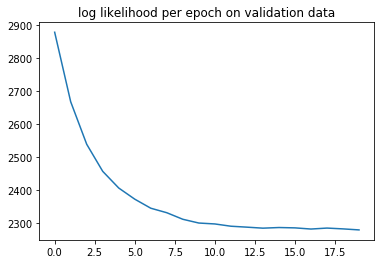

In [100]:
negll_graph(dev_data, sgddev_ratings, theta_list)

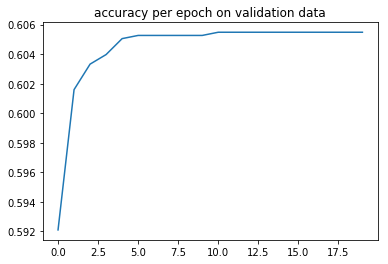

In [157]:
error_graph(test_data, sgdtest_ratings, theta_list) #incorrect label sorry 

In [118]:
import time 
t1 = time.time()
new_theta_list = sgd(15, 5000, train_data, train_ratings, .1, .001)
t2 = time.time()
print("sgd running time train data:", t2 - t1)

sgd running time train data: 19.212368965148926


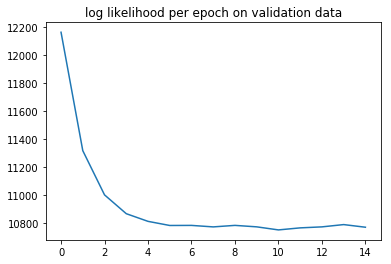

In [105]:
negll_graph(train_data, train_ratings, new_theta_list)

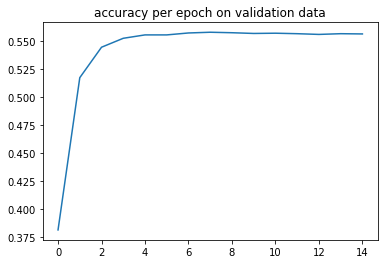

In [153]:
error_graph(test_data, test_ratings, new_theta_list)